In [23]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = pd.read_csv('../Datos/Modelo_1_CL_0.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,5175.171,36.402569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,384.372321,541.767494,592.905628,314.005759,585.468986
1,2892.510,36.188641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,327.393455,541.767494,592.905628,314.005759,219.412775
2,2862.675,35.674493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,389.883829,551.483986,619.755612,317.294856,218.312593
3,1822.080,35.570941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,389.883829,486.605127,513.804464,317.294856,218.312593
4,5083.960,34.484046,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,296.164486,136.798149,90.608182,314.585845,217.931319


In [25]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [26]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [28]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [29]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[869.51932592],
       [ 89.40380145],
       [113.69985379]])

In [30]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[253.47760032],
       [395.99777727],
       [846.20273089]])

In [31]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [32]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.585617,144.487972,162473.266748,403.079728
test,0.706310,138.730053,88007.118865,296.659938


Text(0, 0.5, 'Predicciones (y_test_pred)')

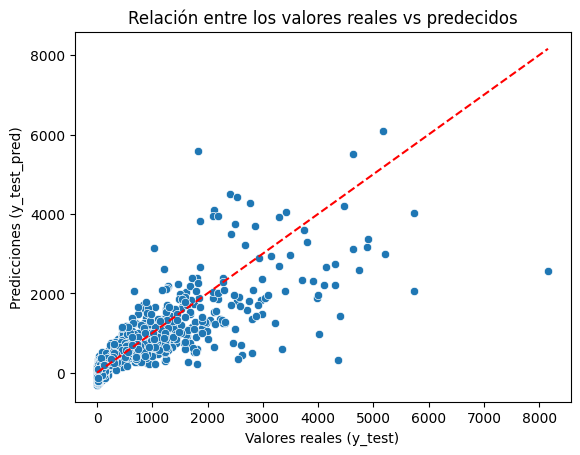

In [33]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

## Decision Tree

In [34]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [35]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [36]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [37]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [38]:
params_arbol_5 = {
    'max_depth': [5],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [17,20,22],
    'max_leaf_nodes': [38,40,42]
}

In [39]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5], 'max_leaf_nodes': [38, 40, 42],
                         'min_samples_leaf': [17, 20, 22],
                         'min_samples_split': [45, 50, 55]},
             scoring='neg_mean_squared_error')

In [40]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [41]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=42, min_samples_leaf=20,
                      min_samples_split=45)

In [42]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [43]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [44]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.665684,107.155830,131080.302881,362.050139
test,0.803019,101.479004,59027.322119,242.955391


In [45]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.071668,0.009159,0.007639,0.002589,5,42,20,45,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-113193.759309,-100779.420097,-84085.494056,-357038.585791,-57889.309846,-142597.313820,108809.414452,1
3,0.103051,0.024571,0.007773,0.002557,5,38,20,45,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-113193.759309,-100779.420097,-84085.494056,-357038.585791,-57889.309846,-142597.313820,108809.414452,2
12,0.083904,0.014204,0.006142,0.001838,5,40,20,45,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-113193.759309,-100779.420097,-84085.494056,-357038.585791,-57889.309846,-142597.313820,108809.414452,2
26,0.065359,0.012077,0.004445,0.000524,5,42,22,55,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
17,0.068943,0.006691,0.006451,0.001422,5,40,22,55,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
16,0.085615,0.010705,0.006608,0.002148,5,40,22,50,"{'max_depth': 5, 'max_leaf_nodes': 40, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
7,0.090423,0.014648,0.006633,0.001685,5,38,22,50,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
8,0.111032,0.018477,0.005750,0.000686,5,38,22,55,"{'max_depth': 5, 'max_leaf_nodes': 38, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
25,0.060624,0.013555,0.005427,0.001023,5,42,22,50,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-112739.948580,-100624.248054,-82585.865651,-362289.037770,-57816.213811,-143211.062773,111090.035082,4
23,0.078937,0.015253,0.007443,0.003636,5,42,20,55,"{'max_depth': 5, 'max_leaf_nodes': 42, 'min_sa...",-113193.759309,-100624.248054,-84085.494056,-362289.037770,-58263.670443,-143691.241926,110833.725827,10


In [46]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
21,5,42,20,45,-142597.313820
3,5,38,20,45,-142597.313820
12,5,40,20,45,-142597.313820
26,5,42,22,55,-143211.062773
17,5,40,22,55,-143211.062773
16,5,40,22,50,-143211.062773
7,5,38,22,50,-143211.062773
8,5,38,22,55,-143211.062773
25,5,42,22,50,-143211.062773
23,5,42,20,55,-143691.241926


In [47]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [48]:
df_rmse_prof

,param_max_depth,MSE
0,5,379.040568


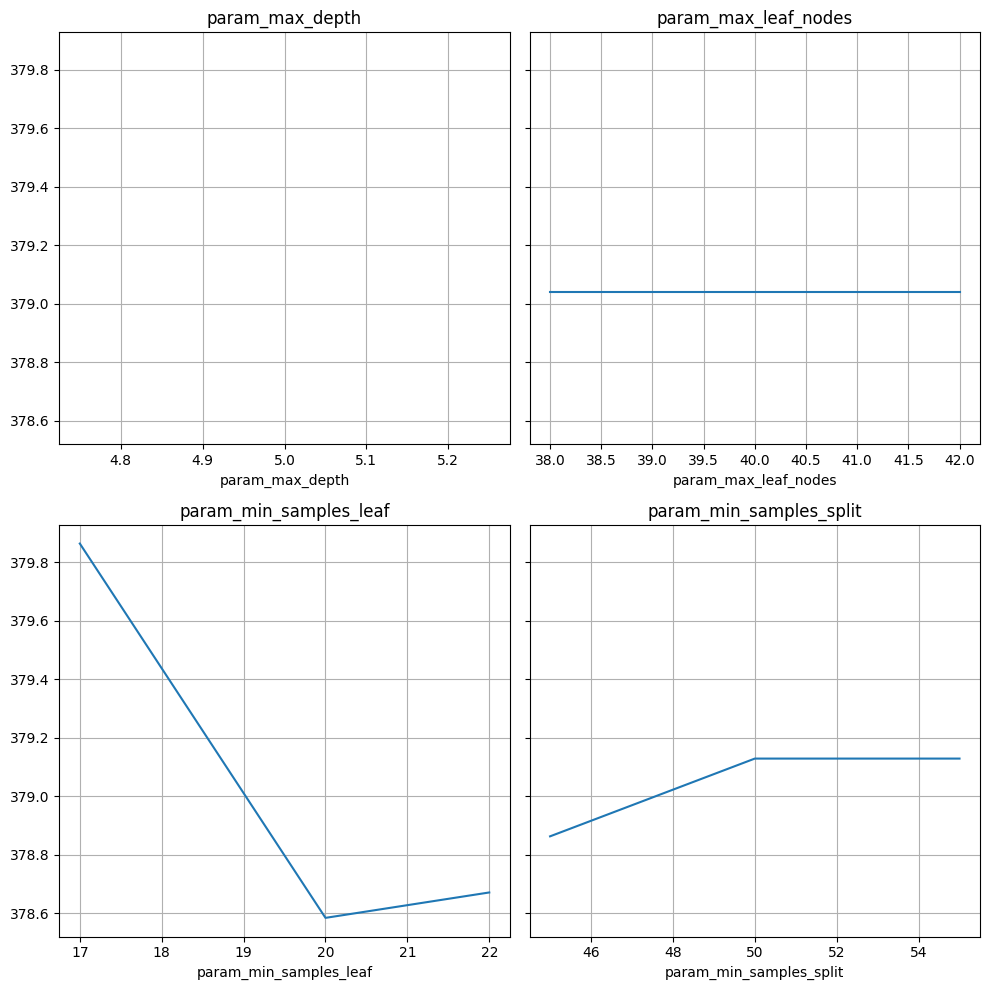

In [49]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [50]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

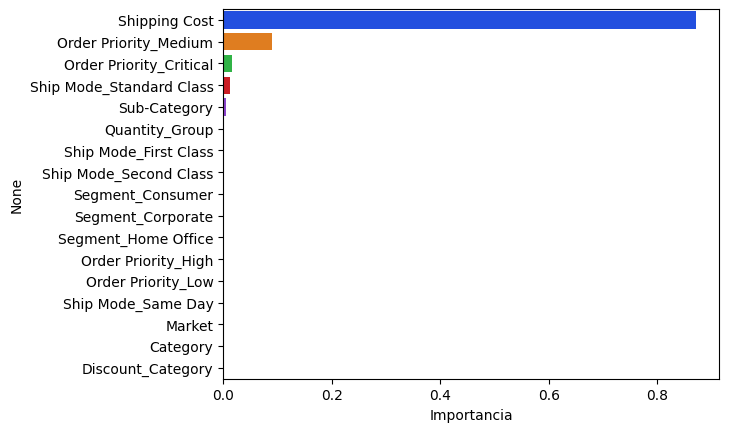

In [51]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [52]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [5,6,7],
    'min_samples_split': [45,50,55],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [53]:
modelo_final_rrf

RandomForestRegressor(max_depth=7, max_features=16, max_leaf_nodes=50,
                      min_samples_leaf=20, min_samples_split=45,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [54]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.699072,94.195103,117989.517945,343.496023
test,0.825187,89.469461,52384.598839,228.876820


### Random Distinto

In [ ]:
params_rf = {
    'n_estimators': [35,50,75,115,110,120,150],
    'max_features': [3,5,7,10,15,18,20],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [50,60,65],
    'min_samples_leaf': [19,21], 
    'max_leaf_nodes': [2,4,6]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

## Gradient Booster

In [ ]:
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [ ]:
modelo_final_gb

In [ ]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

## XGB

In [ ]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [ ]:
modelo_final_xgb

In [ ]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb